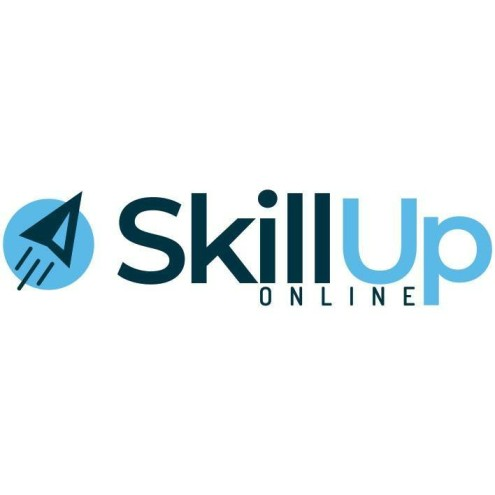

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importo las bibliotecas necesarias
!pip install scikit-learn
!pip install nbconvert[qtpdf]
!pip install pandoc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importo bibliotecas para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

zsh:1: no matches found: nbconvert[qtpdf]


### Importa y organiza el dataset

In [3]:
# Cargo mis datos:
data = pd.read_csv("/Users/alexandramora/Documents/IA/creditcard.csv")

#Verifico cuantas filas tengo en mi dataset:
Numero_total_datos = data.shape[0]
print("Total de filas en mi dataset:\n")
print(Numero_total_datos)

# Muestro solo las primeras 10 filas del dataset
print("Primeras 10 filas:\n")
print(data.head(10))


Total de filas en mi dataset:

284807
Primeras 10 filas:

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22    


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [5]:
# VALORES PERDIDOS
# Verifico los valores nulos en el dataset.
Nulos_Columna = data.isnull().sum()

# Muestro los valores perdidos por columna.
print("Estos son los valores perdidos por columna:\n")
print(Nulos_Columna)

# Como no hay valores perdidos, no hay que limpiar nada.


Estos son los valores perdidos por columna:

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [7]:
# DATOS DUPLICADOS

# Primero verifico si hay filas duplicadas que poder quitar
N_Duplicados = data.duplicated().sum()

# Muestro los duplicados por fila
print("Estos son los valores duplicados:\n")
print(N_Duplicados)

# Como hay 1081 valores duplicados, los quitamos para no tener un dataset sucio y que mi posterior análisis sea más fiable

# Elimino filas duplicadas
data = data.drop_duplicates()

# Verifico nuevamente si hay filas duplicadas
N_Duplicados = data.duplicated().sum()
print("Estos son los valores duplicados después de la limpieza:\n")
print(N_Duplicados)


#Verifico cuantas filas finales tengo en mi dataset:
Numero_total_datos = data.shape[0]
print("Total de filas en mi dataset después de quitar duplicados:\n")
print(Numero_total_datos)

Estos son los valores duplicados:

1081
Estos son los valores duplicados después de la limpieza:

0
Total de filas en mi dataset después de quitar duplicados:

283726


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [9]:

# Cantidad transacciones fraudulentas
N_fraudulentas = data[data['Class'] == 1].shape[0]

# Total de mis transacciones
Total_transacciones = data.shape[0]

# Calculo el porcentaje
Porcentaje_fraudulentas = (N_fraudulentas / Total_transacciones) * 100

# Muestro el porcentaje de transacciones fraudulentas
print(f"Porcentaje de transacciones fraudulentas en el dataset: {Porcentaje_fraudulentas:.2f}%")


Porcentaje de transacciones fraudulentas en el dataset: 0.17%


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [11]:
# Filtramoos solo por transacciones fraudulentas
Transacciones_fraudulentas = data[data['Class'] == 1]

# Calculo el importe medio
Importe_medio_fraudulentas = Transacciones_fraudulentas['Amount'].mean()

# Muestro el importe medio de las transacciones fraudulentas en decimales
print(f"Importe medio de las transacciones fraudulentas: {Importe_medio_fraudulentas:.2f}")



Importe medio de las transacciones fraudulentas: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

Conteo de transacciones fraudulentas y no fraudulentas:
Class
0    283253
1       473
Name: count, dtype: int64


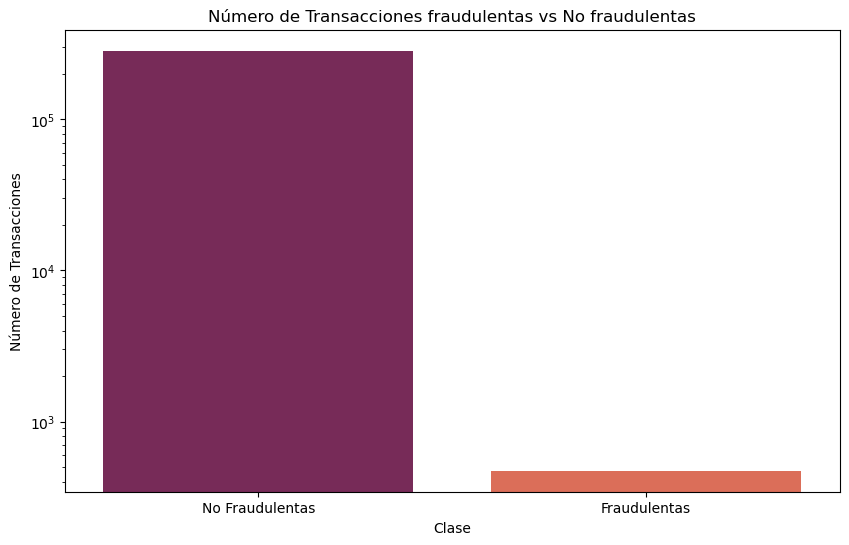

In [13]:

# Primero cuento el número de transacciones en cada clase
Conteo_clases = data['Class'].value_counts()

# Despues verifico el numero de transacciones que hay:
print("Conteo de transacciones fraudulentas y no fraudulentas:")
print(Conteo_clases)

# Creo un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=Conteo_clases.index, y=Conteo_clases.values, palette='rocket')

# Añado etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Número de Transacciones')
plt.title('Número de Transacciones fraudulentas vs No fraudulentas')
plt.xticks(ticks=[0, 1], labels=['No Fraudulentas', 'Fraudulentas'])
plt.yscale('log')  # Cambio la escala para que se vea la diferencia entre las fraudulentas y no fraudulentas


# Muestro el gráfico
plt.show()


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


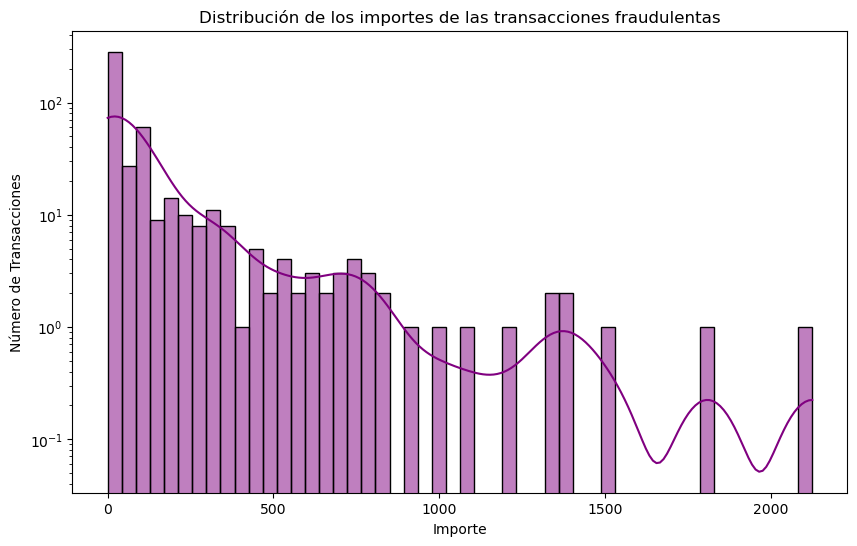

In [15]:

# Filtramoos solo por transacciones fraudulentas
Transacciones_fraudulentas = data[data['Class'] == 1]

# Creo un histograma para visualizar la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(10, 6))
sns.histplot(Transacciones_fraudulentas['Amount'], bins=50, kde=True, color='purple')

# Añado etiquetas y título
plt.xlabel('Importe')
plt.ylabel('Número de Transacciones')
plt.title('Distribución de los importes de las transacciones fraudulentas')
plt.yscale('log')  # Cambio la escala para ver mejor mis datos


# Muestro el gráfico
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [17]:
# Separa los datos de entrenamiento y evaluación

X = data.drop(columns=['Class'])
y = data['Class']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [19]:
# Creo una instancia del clasificador RandomForestClassifier
clf = RandomForestClassifier(max_depth=150, random_state=42)

# Entreno el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Hago predicciones sobre los datos de evaluación
y_pred = clf.predict(X_test)

# Evaluo el modelo utilizando classification_report y accuracy_score
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

print("Exactitud del modelo:")
accuracy = accuracy_score(y_test, y_pred)
print(f"{accuracy * 100:.2f}%")


Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Exactitud del modelo:
99.95%


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>